## Imports

In [1]:
# To embed plots in the notebooks
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np # numpy library
import scipy.io
from scipy.spatial import distance # load distance function
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import KFold

# seaborn can be used to "prettify" default matplotlib plots by importing and setting as default
import seaborn as sns
sns.set() # Set searborn as default

# load dataset

In [4]:
mat = scipy.io.loadmat("Silhouettes.mat")
Fem = mat["Fem"].ravel() - 1  # Get rid of outer dim, -1 due to stupid matlab indexing
Male = mat["Male"].ravel() - 1
Xa = mat["Xa"]
print(np.shape(Xa))

(39, 130)


## 2 Perform model selection for KNN classification (for the silhouette data):
> (a) Load the dataset and plot the silhouettes.


Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


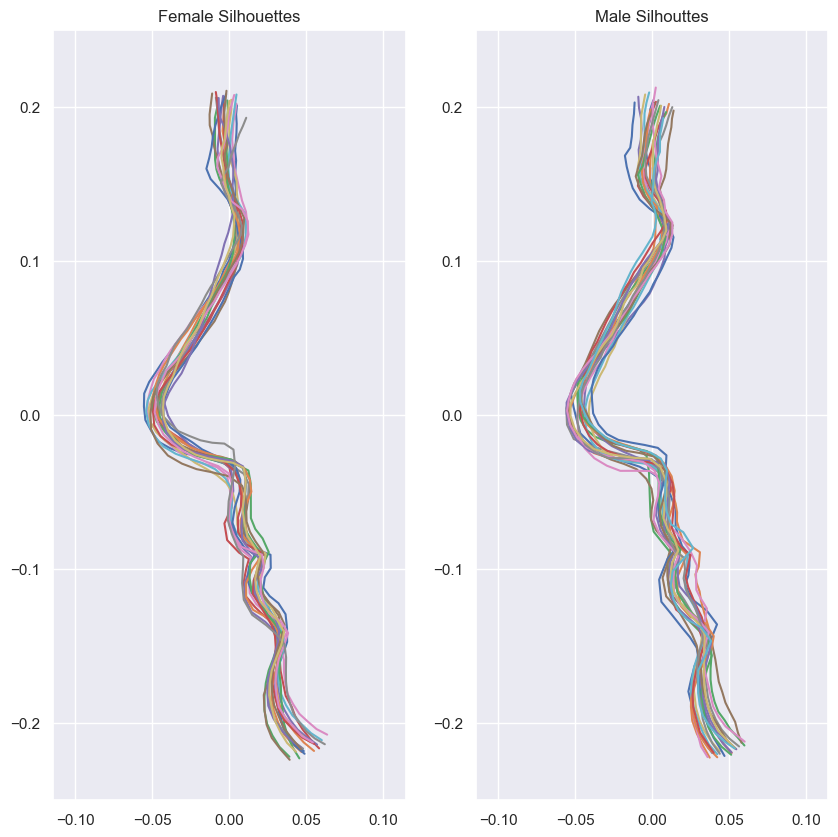

In [7]:
# Create a plot of the female and male silhouettes. Hint: x-values are in the first 65 columns and y-values are in the last 65 columns
fig, axis = plt.subplots(1, 2, figsize=(10, 10))
axis[0].plot(Xa[Fem, :65].T, Xa[Fem, 65:].T)
axis[0].set_title("Female Silhouettes")
axis[0].axis("equal")
axis[0].axis([-0.25, 0.25, -0.25, 0.25])

axis[1].plot(Xa[Male, :65].T, Xa[Male, 65:].T)
axis[1].set_title("Male Silhouttes")
axis[1].axis("equal")
axis[1].axis([-0.25, 0.25, -0.25, 0.25])
plt.show()

>(b) What size of fold would you use for cross-validation for the silhouette data set? Why?

We have very few observations (39), and therefore, I would use leave-one-out cross-validation (LOOCV) which is suitable for small datasets

>(c) Select a suitable number K for KNN classification on the silhouette profiles data using leave-one-out cross-validation.

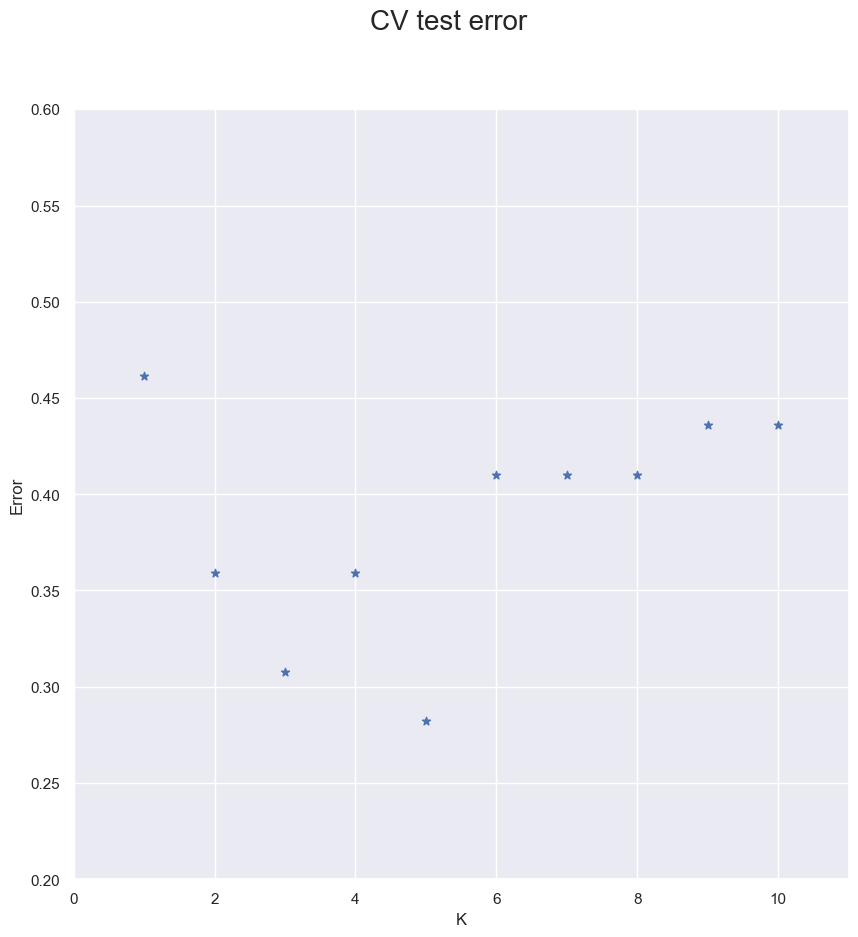

In [12]:
# Setup a response vector
N = np.shape(Xa)[0]
y = np.zeros(N)
y[Fem] = 1
n_classes = 2

# For a suitable number create K chunks of the data. Hint: feel fre to use sklearns "KFold"
K = N  # 39

# select a range of k neighbours
kf = KFold(n_splits=K)
k_neigh = 10
Error = np.zeros((K, k_neigh))


# run KNN with the entire range og k neighbours on all K chunks of the data
# Feel free to use Scikit KNN classifier, as you have already tried implementing it youself

# calculate the mse across folds. You can also use the mae if the mse errors are almost the same

for i, (train_index, test_index) in enumerate(kf.split(Xa)):
    X_train, X_test = Xa[train_index], Xa[test_index]
    y_train, y_test = y[train_index], y[test_index]
    for k in range(1, k_neigh + 1):
        neigh = KNeighborsClassifier(n_neighbors=k, metric="euclidean")
        neigh.fit(X_train, y_train)
        y_pred = neigh.predict(X_test)
        Error[i - 1, k - 1] = np.sum(np.abs(y_pred - y_test)) / len(y_test)

# Plot the error for each number of neighbours
E = np.mean(Error, axis=0)

fig = plt.figure(figsize=(10, 10))
plt.scatter(list(range(1, k_neigh + 1)), E, marker="*")
plt.axis([0, 11, 0.2, 0.6])
fig.suptitle("CV test error", fontsize=20)
plt.xlabel("K")
plt.ylabel("Error")
plt.show()